# Preface
Forest fires have become a grave threat for fauna and flora of Amazon rainforests. The agriculture sector has been relentlessly pushing into the rainforests, cutting down trees and burning the forests. All this has been taking place under the nose of the ignorant Brazilian Government even after widespread international protests.
I have done an in-depth analysis of Forest fires in Brazil from 1997 through 2018. The data is obtained from the official website of the Brazilian government.

# Data
The dataset contains monthly count of forest fires in several states of Brazil.<br>
Columns:<br>
year: Year of fire (1998 - 2017)<br>
state: State where fire took place. <br>
    &emsp;&emsp;'Acre',<br> 
    &emsp;&emsp;'Alagoas',<br> &emsp;&emsp;'Amapa',<br> &emsp;&emsp;'Amazonas',<br> &emsp;&emsp;'Bahia',<br>&emsp;&emsp; 'Ceara',<br>
       &emsp;&emsp;'Distrito Federal',<br> &emsp;&emsp;'Espirito Santo',<br> &emsp;&emsp;'Goias',<br> &emsp;&emsp;'Maranhao',<br>
       &emsp;&emsp;'Mato Grosso',<br> &emsp;&emsp;'Minas Gerais',<br> &emsp;&emsp;'Pará',<br> &emsp;&emsp;'Paraiba',<br> &emsp;&emsp;'Pernambuco',<br>
       &emsp;&emsp;'Piau',<br> &emsp;&emsp;'Rio',<br> &emsp;&emsp;'Rondonia',<br> &emsp;&emsp;'Roraima',<br> &emsp;&emsp;'Santa Catarina',<br>
       &emsp;&emsp;'Sao Paulo',<br> &emsp;&emsp;'Sergipe',<br> &emsp;&emsp;'Tocantins'<br>
month: Month of fire. (Jan-Dec)<br>
date: 1st Jan of year of fire. (redundant, hence removed)


In [1]:
# imports
import numpy as np
import pandas as pd
from ipywidgets import interact
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importing the dataset.
df = pd.read_csv('amazon.csv', encoding='latin1')
df = df.drop('date', axis = 1) #removing 'date' column from dataset as it contains the date 1st Jan of fire year.
months = {'Janeiro':'Jan', 'Fevereiro':'Feb', 'Março':'Mar', 'Abril':'Apr', 'Maio':'May', 'Junho':'June', 'Julho': 'July',
       'Agosto':'Aug', 'Setembro':'Sept', 'Outubro':'Oct', 'Novembro': 'Nov', 'Dezembro':'Dec'}
df['month'] = df['month'].apply(lambda x: months[x]) #translating month name to English.
df['number'] = df['number'].round(0) # Rounding off the number of forest fires to integers
df.head()

,year,state,month,number
0,1998,Acre,Jan,0.0
1,1999,Acre,Jan,0.0
2,2000,Acre,Jan,0.0
3,2001,Acre,Jan,0.0
4,2002,Acre,Jan,0.0


In [3]:
# Plotting yearly count trend of fires.
fires = df[['year', 'number']].groupby(['year']).sum()
fires = fires.reset_index()
state_wise = df.groupby(['state', 'year']).sum().reset_index()

In [4]:
state_wise[['state', 'number']].groupby(['state']).sum().sort_values(by = ['number'], ascending = False).head(10).reset_index()

,state,number
0,Mato Grosso,96238.0
1,Paraiba,52435.0
2,Sao Paulo,51121.0
3,Rio,45160.0
4,Bahia,44745.0
5,Piau,37801.0
6,Goias,37692.0
7,Minas Gerais,37474.0
8,Tocantins,33706.0
9,Amazonas,30647.0


We will also visualize the fire counts of each state individually.

In [5]:
@interact (state = ['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Paraiba', 'Pará', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'])
def plot_graphs(state):
    plt.figure(figsize = (16, 6))
    sns.set_style("whitegrid")
    ax = sns.lineplot(x='year', y='number', data = fires, color = 'red', lw = 4)
    ax = sns.lineplot(x='year', y='number', data = state_wise[state_wise['state'] == state], color = 'orange', lw = 4)
    ax.set(xlabel='Year', ylabel='Number of Fires', title = 'Forest Fires in ' + state)
    ax.xaxis.set_major_locator(plt.MaxNLocator(21))
    ax.yaxis.set_major_locator(plt.MaxNLocator(15))
    ax.set_xlim(1998, 2018)
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
    plt.show()

interactive(children=(Dropdown(description='state', options=('Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', …

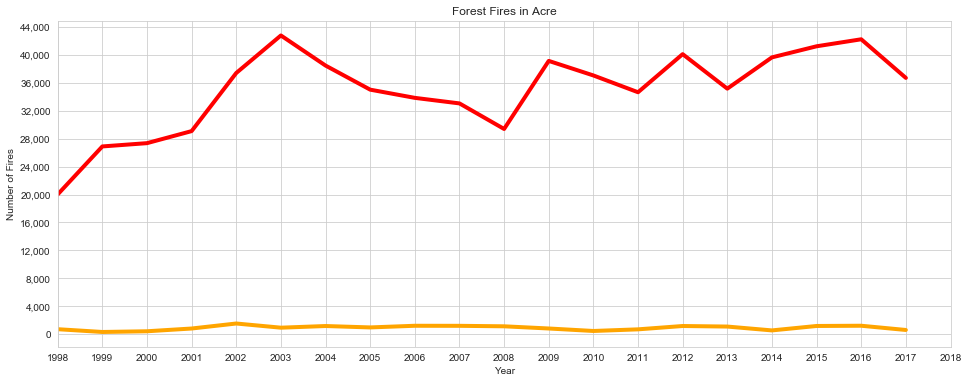

In [11]:
# As Interactive graphs don't work on published notebooks, this cell outputs static graph for 'Acre' state.
plot_graphs('Acre')

Looking at graphs above, we cannot come to the conclusion that fire count has been increasing or decreasing over the years. It seems to be random.

In [12]:
month_wise = df[['month', 'number']].groupby(['month']).mean().reset_index()

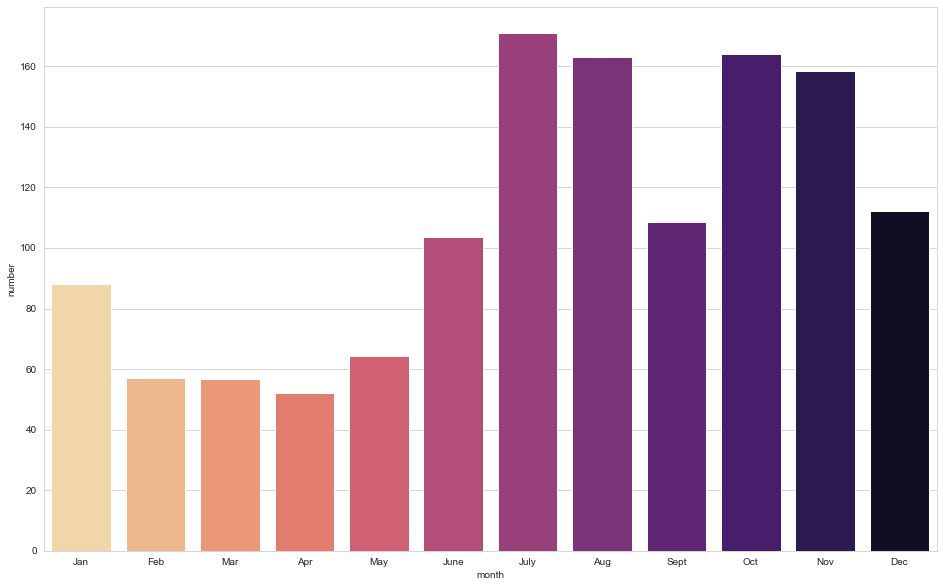

In [13]:
plt.figure(figsize = (16,10))
sns.barplot(x = 'month', y = 'number', data = month_wise, palette = 'magma_r', order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])

The second half of the year sees a higher number of forest fires. July-Dec period sees more than 100 fires every month on average.July tops the charts with more than 160 fires each year on average, which is expected as July sees highest temperatures of the year.

In [ ]:
END